In [1]:
# Remove old train/test data
def deleteFiles(folder_path):
    print(f"Deleting old files in {folder_path}")
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

# Generate random train/test data

In [6]:
import os
import random
import shutil

# Set path to main data directory
dataPath = 'Data'

# Choose what data to use
usePremade = False
useImages = True
useGeneratedGrams = True

# Split train/test data
trainSplit = 0.70

path = os.path.join(dataPath, 'genres_original')

# Get list for all genre directories
genres = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

for genre in genres:
    # Set path to current genre directory
    path = os.path.join(dataPath, 'genres_original', genre)
    
    # Get list of all files in current genre directory
    files = os.listdir(path)
    
    # Ramdomize order of files
    random.shuffle(files)
    
    # Split files into train and test samples
    num_train_samples = int(len(files) * trainSplit)
    train_samples = files[:num_train_samples]
    test_samples = files[num_train_samples:]

    # Set paths for train and test directories for current genre
    train_path = os.path.join(dataPath, "training_data", genre)
    test_path = os.path.join(dataPath, "testing_data", genre)
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    # Delete old train data
    if len(os.listdir(train_path)) > 0:
        deleteFiles(train_path)
    # Copy train samples to train directory
    for sample in train_samples:
        src_path = os.path.join(path, sample)
        dst_path = os.path.join(train_path, sample)
        shutil.copy(src_path, dst_path)
        
    # Delete old test data
    if len(os.listdir(test_path)) > 0:
        deleteFiles(test_path)    
    # Copy test samples to test directory
    for sample in test_samples:
        src_path = os.path.join(path, sample)
        dst_path = os.path.join(test_path, sample)
        shutil.copy(src_path, dst_path)

Deleting old files in Data\training_data\blues
Deleting old files in Data\testing_data\blues
Deleting old files in Data\training_data\classical
Deleting old files in Data\testing_data\classical
Deleting old files in Data\training_data\country
Deleting old files in Data\testing_data\country
Deleting old files in Data\training_data\disco
Deleting old files in Data\testing_data\disco
Deleting old files in Data\training_data\hiphop
Deleting old files in Data\testing_data\hiphop
Deleting old files in Data\training_data\jazz
Deleting old files in Data\testing_data\jazz
Deleting old files in Data\training_data\metal
Deleting old files in Data\testing_data\metal
Deleting old files in Data\training_data\pop
Deleting old files in Data\testing_data\pop
Deleting old files in Data\training_data\reggae
Deleting old files in Data\testing_data\reggae
Deleting old files in Data\training_data\rock
Deleting old files in Data\testing_data\rock


## Use existing dataset features as an original baseline

In [7]:
import csv

# If premade data is enabled
if usePremade:
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []

    # Open csv file containing pre-made dataset
    with open('Data/features_30_sec.csv', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        next(reader)

        # Initialize counter
        i = 0
        # Loop through each row in the csv file
        for row in reader:
            # Get file path
            imgPath = "Data/images_original/" + row[0].split('.')[0] + "/" + row[0].split('.')[0] + row[0].split('.')[1] + ".png"
            
            # Load image and resize it to 128x128
            if useImages:
                img = cv.imread(imgPath)
                img = cv.resize(img, (128, 128))
                gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

                # Flatten image and add pixel values to the row
                for val in gray.flatten():
                    row.insert(-1, val)

            # Split data into train and test sets
            if(i % 100 < 100 * trainSplit):
                Y_train.append(row[0].split('.')[0])    
                X_train.append(row[1:-1])
            else:
                Y_test.append(row[0].split('.')[0])    
                X_test.append(row[1:-1])
                
            # Increment counter
            i+=1

    # Convert data from string to float
    X_train = [[float(item) if isinstance(item, str) else item for item in items] for items in X_train]
    X_test = [[float(item) if isinstance(item, str) else item for item in items] for items in X_test]

    # Display size of train and test sets
    print(len(Y_train))
    print(len(X_train))
    print(len(Y_test))
    print(len(X_test))
    print((X_train[:1]))

# Display sample image data

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load sample images from each genre
img1 = cv2.imread("Data/images_original/blues/blues.00009.png")
img2 = cv2.imread("Data/images_original/classical/classical.00009.png")
img3 = cv2.imread("Data/images_original/country/country.00009.png")
img4 = cv2.imread("Data/images_original/disco/disco,00009.png")
img5 = cv2.imread("Data/images_original/hiphop/hiphop00009.png")
img6 = cv2.imread("Data/images_original/jazz/jazz00009.png")
img7 = cv2.imread("Data/images_original/metal/metal00009.png")
img8 = cv2.imread("Data/images_original/pop/pop00009.png")
img9 = cv2.imread("Data/images_original/reggae/reggae00009.png")
img10 = cv2.imread("Data/images_original/rock/rock00009.png")

# Display images
imgplot1 = plt.imshow(img1)
plt.title("Blues")

plt.figure()
imgplot2 = plt.imshow(img2)
plt.title("Classical")

plt.figure()
imgplot3 = plt.imshow(img3)
plt.title("Country")

plt.figure()
imgplot4 = plt.imshow(img4)
plt.title("Disco")

plt.figure()
imgplot5 = plt.imshow(img5)
plt.title("HipHop")

plt.figure()
imgplot6 = plt.imshow(img6)
plt.title("Jazz")

plt.figure()
imgplot7 = plt.imshow(img7)
plt.title("Metal")

plt.figure()
imgplot8 = plt.imshow(img8)
plt.title("Pop")

plt.figure()
imgplot9 = plt.imshow(img9)
plt.title("Reggae")

plt.figure()
imgplot10 = plt.imshow(img10)
plt.title("Rock")

plt.show()

# Generate Chroma Features

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generateMels():
    # Set data path
    dataPath = os.path.join('Data', 'genres_original')
    
    # Iterate through genres
    for genre in os.listdir(dataPath):
        # set genre (modify as needed)
        if (genre == 'rock'):
            i = 0
            # Iterate through files in genre directory
            for file in os.listdir(os.path.join(dataPath, genre)):
                # Select point to start generating (modify as needed)
                if(i < 0):
                    i+=1
                    continue
                # Load audio file
                audio, sr = librosa.load(os.path.join(dataPath, genre, file))
                
                # Generate mel-spectrogram
                spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
                spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
                
                # Display spectrogram
                librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
                plt.axis('off')
                
                # Create directory to save generated images
                os.makedirs(f"Data/generatedImages/{genre}",exist_ok=True)
                plt.savefig(f"Data/generatedImages/{genre}/{file[:-4]}.png", bbox_inches='tight', pad_inches=0)

In [9]:
import numpy as np
import pandas as pd
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from skimage.feature import local_binary_pattern
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [10]:
# Extract color histogram features
def extract_color_histogram(image):
    hist = cv.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv.normalize(hist, hist).flatten()
    return hist

# Extract local binary pattern features
def extract_lbp_features(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 1, 8)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
    return hist

# Extract convolutional neural network features using pretrained ResNet50 model
def extract_cnn_features(img):
    model = ResNet50(weights='imagenet', include_top=False)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (224, 224))
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    features = model.predict(img)
    flattened_features = features.flatten()
    return flattened_features

In [11]:
# If path doesnt exist generate new mel-spectrograms
if not os.path.exists('Data/generatedImages'):
    generateMels()

# Initialize empty lists for training and testing data
if not usePremade:
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []

    # Set max size of chromagram feature vector
    maxSize = 16000

    # Loop through training data
    trainingPath = os.path.join(dataPath, 'training_data')
    for genre in os.listdir(trainingPath):
        for file in os.listdir(os.path.join(trainingPath, genre)):

            # Load audio file and generate chromagram
            y, sr = librosa.load(os.path.join(trainingPath, genre, file))
            chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

            # Flatten chromagram and pad to max size
            flattened = chromagram.flatten()
            if len(flattened) < maxSize:
                flattened = np.pad(flattened, (0, maxSize - len(flattened)), mode='constant')
            else:
                flattened = flattened[:maxSize]

            # Append image features if enabled
            if useImages and useGeneratedGrams:
                # Load generated image and resize to 128x128
                imgPath = "Data/generatedImages/" + file.split('.')[0] + "/" + file[:-4] + ".png"
                img = cv.imread(imgPath)
                img = cv.resize(img, (128, 128))

                # Convert to grayscale and append flattened values to feature vector
                gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                for val in gray.flatten():
                    flattened = np.insert(flattened, len(flattened), val)
                    
            # Append color hisogram and LBP features if enabled
            if useImages and not useGeneratedGrams:
                print('Using premade images')
                imgPath = "Data/generatedImages/" + file.split('.')[0] + "/" + file[:-4] + ".png"
                img = cv.imread(imgPath)
                
                # Append color histogram features
                temp = extract_color_histogram(img)
                for data in temp:
                    flattened = np.insert(flattened, len(flattened), data)
                
                # Append LBP features
                temp = extract_lbp_features(img)
                for data in temp:
                    flattened = np.insert(flattened, len(flattened), data)
                     
                # Append CNN features
#                 temp = extract_cnn_features(img)
#                 for data in temp:
#                     flattened = np.insert(flattened, len(flattened), data)
                
            # Append feature vector and genre label to training lists
            X_train.append(flattened)
            Y_train.append(genre)

    # Loop through testing data
    testingPath = os.path.join(dataPath, 'testing_data')
    for genre in os.listdir(testingPath):
        for file in os.listdir(os.path.join(testingPath, genre)):
            # Load audio file and generate chromagram
            y, sr = librosa.load(os.path.join(testingPath, genre, file))
            chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

            # Flatten chromagram and pad to max size
            flattened = chromagram.flatten()
            if len(flattened) < maxSize:
                flattened = np.pad(flattened, (0, maxSize - len(flattened)), mode='constant')
            else:
                flattened = flattened[:maxSize]

            # Append image features if enabled and generated images are used
            if useImages and useGeneratedGrams:
                imgPath = "Data/generatedImages/" + file.split('.')[0] + "/" + file[:-4] + ".png"
                img = cv.imread(imgPath)
                img = cv.resize(img, (128, 128))
                gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                # Flatten gray image pixels and add to flattened list
                for val in gray.flatten():
                    flattened = np.insert(flattened, len(flattened), val)   
            
            # Append image features if enabled and premade images are used
            if useImages and not useGeneratedGrams:
                print('Using premade images')
                imgPath = "Data/generatedImages/" + file.split('.')[0] + "/" + file[:-4] + ".png"
                img = cv.imread(imgPath)
                
                # Append histogram features
                temp = extract_color_histogram(img)
                for data in temp:
                    flattened = np.insert(flattened, len(flattened), data)
              
                # Append LBP features
                temp = extract_lbp_features(img)
                for data in temp:
                    flattened = np.insert(flattened, len(flattened), data)
                    
                # Append CNN features
#                 temp = extract_cnn_features(img)
#                 for data in temp:
#                     flattened = np.insert(flattened, len(flattened), data)
                
            # Append feature vector and genre label to testing lists    
            X_test.append(flattened)
            Y_test.append(genre)

TESTING


In [12]:
# Scale training and testing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
import os
import random
import shutil
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

              precision    recall  f1-score   support

       blues       0.86      0.40      0.55        30
   classical       0.63      0.87      0.73        30
     country       0.46      0.40      0.43        30
       disco       0.38      0.40      0.39        30
      hiphop       0.60      0.50      0.55        30
        jazz       0.68      0.50      0.58        30
       metal       0.92      0.77      0.84        30
         pop       0.54      0.70      0.61        30
      reggae       0.51      0.67      0.58        30
        rock       0.32      0.40      0.36        30

    accuracy                           0.56       300
   macro avg       0.59      0.56      0.56       300
weighted avg       0.59      0.56      0.56       300

              precision    recall  f1-score   support

       blues       0.28      0.73      0.41        30
   classical       0.76      0.43      0.55        30
     country       1.00      0.23      0.38        30
       disco       0.25 

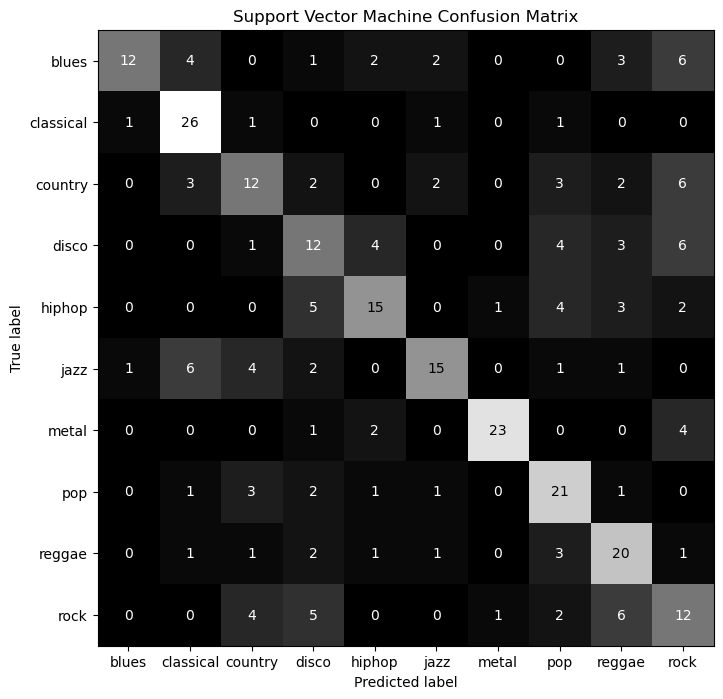

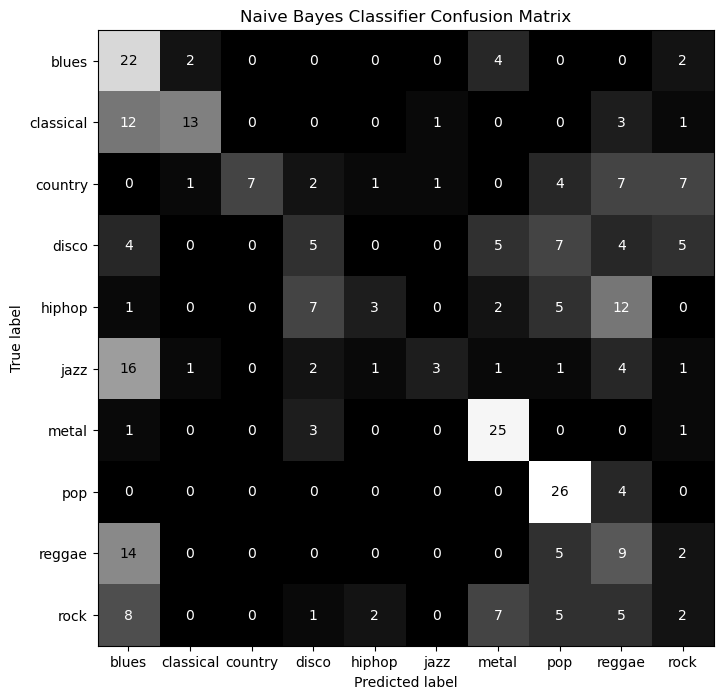

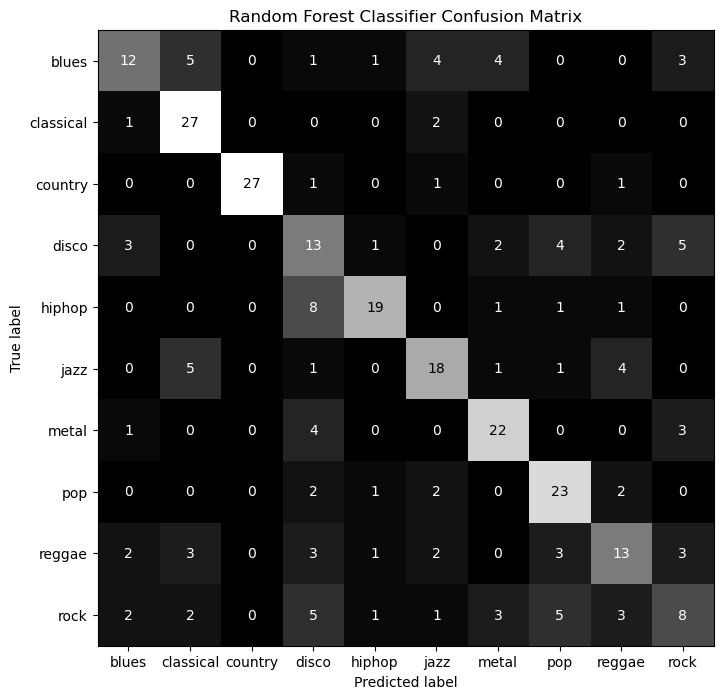

In [14]:
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# Fit classifiers onto training data
svc.fit(X_train, Y_train)
nbc.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)

# Predict classes and probabliities of test data
y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

# Display classification report
print(classification_report(Y_test, y_svc_predicted))
print(classification_report(Y_test, y_nbc_predicted))
print(classification_report(Y_test, y_rfc_predicted))

# Set up data for confusion matricies
models = ['Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [ y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]
plot = 1 # counter for subplots

# Zip arrays to access nth element of each simultaneously
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(np.array(Y_test).ravel(), prediction), display_labels=genres)
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    # Display confusion matricies
    disp.figure_.set_size_inches(10,8)
    disp.ax_.set_title(f"{model} Confusion Matrix")

# Pull track from Spofity API to test against model

In [2]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import librosa
import IPython.display as ipd

# How to get tokens: developer.spotify.com -> dashboard -> app_name -> settings
client_id = '30f528e57a4d4ef5b61c8ed3f39ec024'
client_secret = '7433bfdaedb5499cb1d662404c9cdc93'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Search for song
song_name = '2 Phones'
artist_name = 'Kevin Gates'
results = spotify.search(q=f'track:{song_name} artist:{artist_name}', type='track', limit=1)

# Get first track in search results
track = results['tracks']['items'][0]

# Details about the track
print(f"Track Name: {track['name']}")
print(f"Artist Name: {track['artists'][0]['name']}")
print(f"Album Name: {track['album']['name']}")

# Get audio file URL for 30s preview
preview_url = track['preview_url']

# Download preview as mp3 (only option)
response = requests.get(preview_url)
mp3_file_path = track['name'] + ".mp3"
with open(mp3_file_path, 'wb') as f:
    f.write(response.content)

# Audio preview
y, sr = librosa.load(mp3_file_path)
ipd.Audio(y, rate=sr)

Track Name: 2 Phones
Artist Name: Kevin Gates
Album Name: Islah (Deluxe)


In [4]:
# Delete test file
os.remove(mp3_file_path)